In [1]:
import numpy as np

prob_succ_gen = 1
prob_succ_swap = 1
prob_swap = 0.2
time_cutoff = 7
qubits_per_node = 2*time_cutoff # Represents an infinite memory

time = 101
max_swap_dist = 4
number_of_nodes = 5000
test = False

virtual_node_degree = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Time/virtual_node_degree.npy')
virtual_neighbourhood_size = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Time/virtual_neighbourhood_size.npy')

In [2]:
k_mean_0 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/k_mean_0.npy')
k_mean_5 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/k_mean_5.npy') 
V_mean_0 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/V_mean_0.npy') 
V_mean_5 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/V_mean_5.npy') 

virtual_node_degree_10pct_0 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_node_degree_10pct_0.npy')
virtual_node_degree_25pct_0 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_node_degree_25pct_0.npy') 
virtual_node_degree_75pct_0 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_node_degree_75pct_0.npy') 
virtual_node_degree_90pct_0 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_node_degree_90pct_0.npy') 

virtual_node_degree_10pct_5 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_node_degree_10pct_5.npy')
virtual_node_degree_25pct_5 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_node_degree_25pct_5.npy') 
virtual_node_degree_75pct_5 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_node_degree_75pct_5.npy') 
virtual_node_degree_90pct_5 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_node_degree_90pct_5.npy') 

virtual_neighbourhood_size_10pct_0 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_neighbourhood_size_10pct_0.npy')
virtual_neighbourhood_size_25pct_0 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_neighbourhood_size_25pct_0.npy')   
virtual_neighbourhood_size_75pct_0 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_neighbourhood_size_75pct_0.npy')   
virtual_neighbourhood_size_90pct_0 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_neighbourhood_size_90pct_0.npy')  

virtual_neighbourhood_size_10pct_5 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_neighbourhood_size_10pct_5.npy')
virtual_neighbourhood_size_25pct_5 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_neighbourhood_size_25pct_5.npy')   
virtual_neighbourhood_size_75pct_5 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_neighbourhood_size_75pct_5.npy')  
virtual_neighbourhood_size_90pct_5 = np.load('FOLDER_LOCATION/Infinite networks/Convergence/Sample/virtual_neighbourhood_size_90pct_5.npy')

In [3]:
node_averaged_k = np.empty(time)
virtual_node_degree_10pct = np.empty(time) 
virtual_node_degree_25pct = np.empty(time)
virtual_node_degree_75pct = np.empty(time) 
virtual_node_degree_90pct = np.empty(time)
node_averaged_V = np.empty(time)
virtual_neighbourhood_size_10pct = np.empty(time)
virtual_neighbourhood_size_25pct = np.empty(time)
virtual_neighbourhood_size_75pct = np.empty(time)
virtual_neighbourhood_size_90pct = np.empty(time)
for t in range(time):
    node_averaged_k[t] = np.mean(virtual_node_degree[:, :, t])
    virtual_node_degree_10pct[t] = np.percentile(virtual_node_degree[:, :, t], 10, interpolation='nearest')
    virtual_node_degree_25pct[t] = np.percentile(virtual_node_degree[:, :, t], 25, interpolation='nearest')
    virtual_node_degree_75pct[t] = np.percentile(virtual_node_degree[:, :, t], 75, interpolation='nearest')
    virtual_node_degree_90pct[t] = np.percentile(virtual_node_degree[:, :, t], 90, interpolation='nearest')

    node_averaged_V[t] = np.mean(virtual_neighbourhood_size[:, :, t])
    virtual_neighbourhood_size_10pct[t] = np.percentile(virtual_neighbourhood_size[:, :, t], 10, interpolation='nearest')
    virtual_neighbourhood_size_25pct[t] = np.percentile(virtual_neighbourhood_size[:, :, t], 25, interpolation='nearest')
    virtual_neighbourhood_size_75pct[t] = np.percentile(virtual_neighbourhood_size[:, :, t], 75, interpolation='nearest')
    virtual_neighbourhood_size_90pct[t] = np.percentile(virtual_neighbourhood_size[:, :, t], 90, interpolation='nearest')

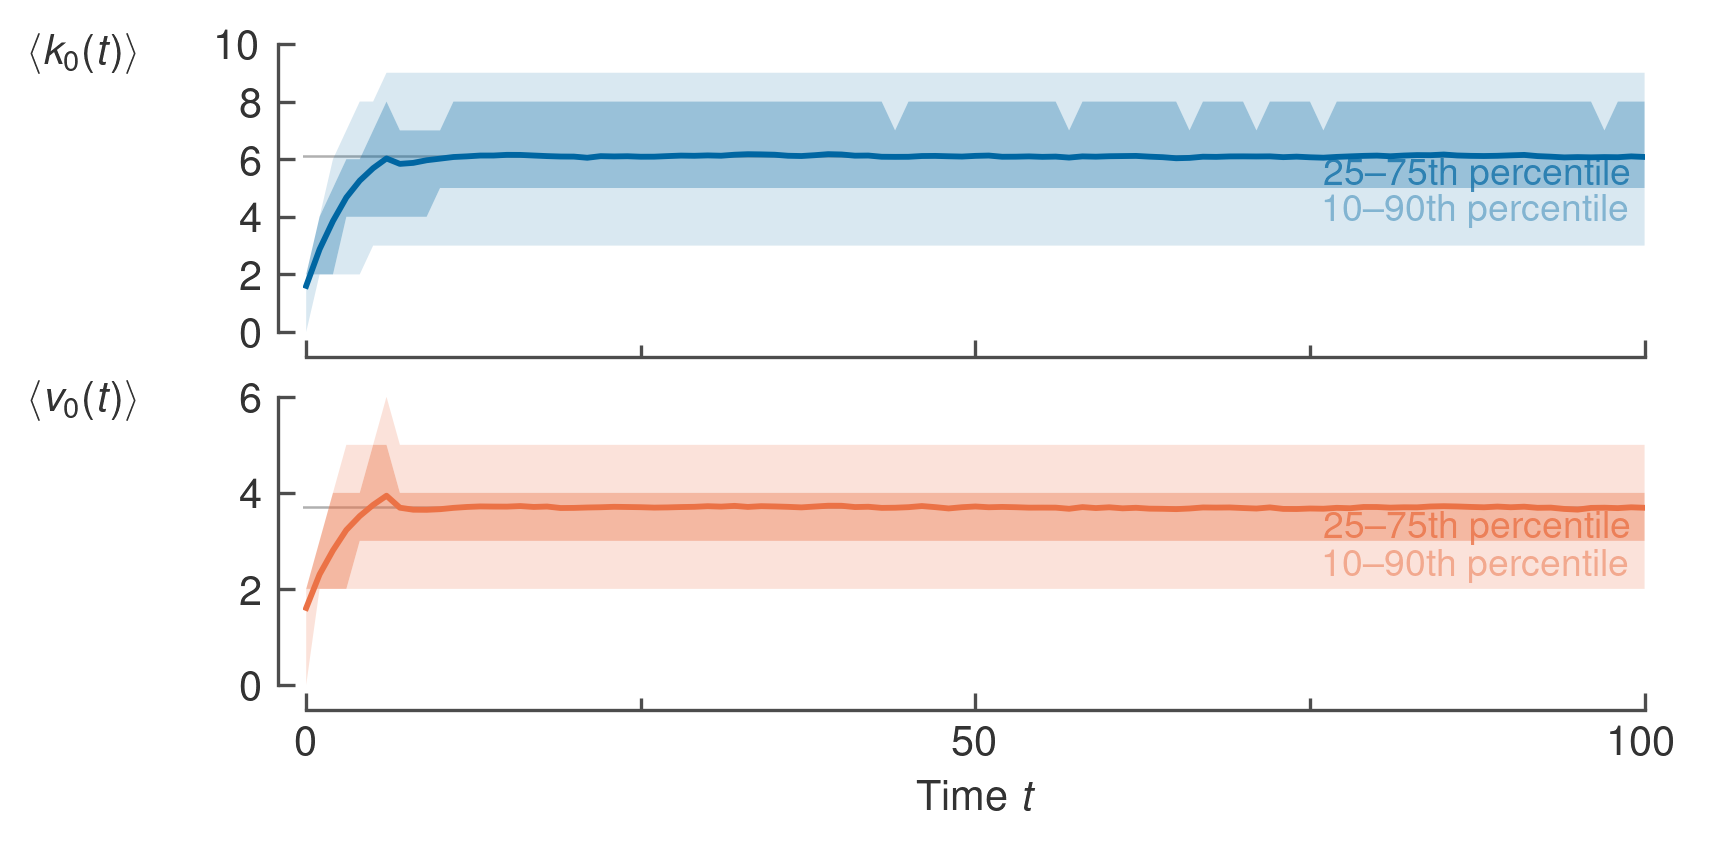

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from itertools import product

outward = 6

color_virtual_node_degree = '#0066A2'
color_virtual_neighbourhood_size = '#EB7246'

plt.style.use('FOLDER_LOCATION/figure.mplstyle')
color_text = (0, 0, 0, 0.8)

mm = 1/25.4
fig, ax = plt.subplots(2, 1, constrained_layout=True, figsize=[157.5*mm*0.9, 157.5*mm/16*7], sharex=True)

ax[0].spines['bottom'].set_position(('outward', outward))
ax[0].spines['left'].set_position(('outward', outward))

ax[0].plot(k_mean_0, color=color_virtual_node_degree)
ax[0].fill_between(range(time), virtual_node_degree_25pct_0, virtual_node_degree_75pct_0, facecolor=color_virtual_node_degree, alpha=0.4, label=r'25--75th percentile')
ax[0].fill_between(range(time), virtual_node_degree_10pct_0, virtual_node_degree_25pct_0, facecolor=color_virtual_node_degree, alpha=0.15, label=r'10--90th percentile')
ax[0].fill_between(range(time), virtual_node_degree_75pct_0, virtual_node_degree_90pct_0, facecolor=color_virtual_node_degree, alpha=0.15)
ax[0].text(99, 5.15, r'25--75th percentile', ha='right', color=color_virtual_node_degree, alpha=0.7, fontsize=9)
ax[0].text(99, 3.9, r'10--90th percentile', ha='right', color=color_virtual_node_degree, alpha=0.4, fontsize=9)

ax[0].set_ylabel(r'$\langle k_0(t)\rangle$', rotation=0, y=0.9, labelpad = 17.5, ha='right')
ax[0].set_xlim(-0.25, 100)
ax[0].set_ylim(0, 10)

ax[0].tick_params(axis='y', which='minor', direction='out', size = 0)
ax[0].set_xticks([0, 50, 100])
ax[0].set_xticks([25, 75], minor=True)
ax[0].set_yticks([0, 2, 4, 6, 8, 10])
ax[0].set_yticks([6.1], minor=True)
ax[0].tick_params(axis='x', direction='in', which='both')
ax[0].spines['bottom'].set_bounds(0, 100)

ax[0].grid(axis='y', which='minor', linewidth=0.6)
ax[0].set_axisbelow(True)

ax[1].spines['bottom'].set_position(('outward', outward))
ax[1].spines['left'].set_position(('outward', outward))

ax[1].plot(V_mean_0, color=color_virtual_neighbourhood_size)
ax[1].fill_between(range(time), virtual_neighbourhood_size_25pct_0, virtual_neighbourhood_size_75pct_0, facecolor=color_virtual_neighbourhood_size, alpha=0.5, label=r'25--75th percentile')
ax[1].fill_between(range(time), virtual_neighbourhood_size_10pct_0, virtual_neighbourhood_size_25pct_0, facecolor=color_virtual_neighbourhood_size, alpha=0.2, label=r'10--90th percentile')
ax[1].fill_between(range(time), virtual_neighbourhood_size_75pct_0, virtual_neighbourhood_size_90pct_0, facecolor=color_virtual_neighbourhood_size, alpha=0.2)
ax[1].text(99, 3.1, r'25--75th percentile', ha='right', color=color_virtual_neighbourhood_size, alpha=0.8, fontsize=9)
ax[1].text(99, 2.3, r'10--90th percentile', ha='right', color=color_virtual_neighbourhood_size, alpha=0.5, fontsize=9)

ax[1].grid(axis='y', which='minor', linewidth=0.6)
ax[1].set_axisbelow(True)
ax[1].set_ylabel(r'$\langle v_0(t) \rangle$', rotation=0, y=0.92, labelpad = 23, ha='right')

ax[1].set_xlabel(r'Time $t$')
ax[1].set_ylim(0, 6)

ax[1].tick_params(axis='y', which='minor', direction='out', size = 0)
ax[1].set_xticks([0, 50, 100])
ax[1].set_xticks([25, 75], minor=True)
ax[1].set_yticks([0, 2, 4, 6])
ax[1].set_yticks([3.7], minor=True)
ax[1].spines['bottom'].set_bounds(0, 100)

fig.set_facecolor('white')
# fig.savefig('FOLDER_LOCATION/infinite networks/sample_convergence.pdf', bbox_inches = 'tight', pad_inches=0*mm)